In [7]:
import numpy as np
import pandas as pd
import os

"""
This will load a csv file and return a pandas dataframe
@input: filepath:: string :: filepath of csv file
@input: names:: list :: column names list 
"""
def load_csv(filepath, names=None):
    filepath =  os.path.abspath(filepath)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, names=names, encoding='utf-8')
        return df
    
    return None

filepath = "data/toluca.csv"
df = load_csv(filepath)
df.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


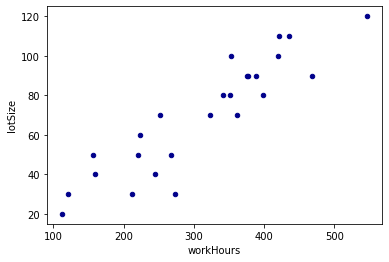

In [49]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x='workHours', y='lotSize', c='DarkBlue')

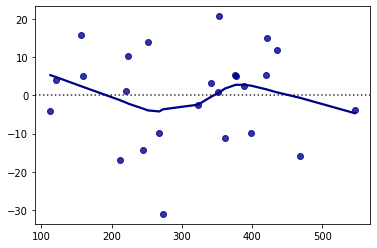

In [50]:
import seaborn as sns
import statsmodels
sns.residplot(df["workHours"].to_numpy(), df["lotSize"].to_numpy(), lowess=True, color="DarkBlue")

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Convert to numpy array
X = df["workHours"].values.reshape(-1, 1)
Y = df["lotSize"].values.reshape(-1, 1)

# Fit against the linear regression model
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

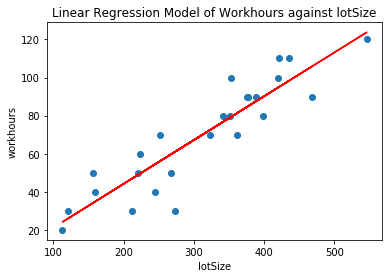

In [54]:
# Plot the linear model against the data
Y_pred = lin_reg.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Linear Regression Model of Workhours against lotSize")
plt.xlabel("lotSize")
plt.ylabel("workhours")
plt.show()

In [55]:
# Gives the prediction score for the linear model
lin_reg.score(X,Y)

0.8215334744346307

In [56]:
#For retrieving the slope:
lin_reg.coef_

array([[0.2301084]])

In [57]:
#For retrieving the intercept:
lin_reg.intercept_

array([-1.85825114])